In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\FALCON\Desktop\term2\machinelearning\appliances_dataset_using_package\KAG_energydata_complete.csv',parse_dates=['date'], index_col= 'date')

In [3]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [4]:
data = df.resample('D').sum() 

In [5]:
df = df.resample('D').mean()
df.shape

(138, 28)

In [6]:
def train_test_split(df):
    
    # compute split point
    end_idx = df.shape[0]* 70 // 100
    
    train_data = df.iloc[1:end_idx, : ]
    test_data = df.iloc[end_idx:, :]
    
    return train_data, test_data

# Split the data into train and test
X_train, X_test = train_test_split(df)

In [7]:
X_test.shape , X_train.shape


((42, 28), (95, 28))

In [8]:
from sklearn.preprocessing import MinMaxScaler
def scale_data(train, test):
    scaler = MinMaxScaler().fit(train)
    return scaler.transform(train), scaler.transform(test), scaler

In [9]:
X_train, X_test, scaler = scale_data(X_train, X_test)

In [10]:
def multivariate_splitter(df):

    input_features = []
    ouput_feature = []
    
    len_df = df.shape[0]
    
    for i in range(len_df):
        
        end_idx = i + 15
        
        if end_idx > len_df-15:
            break
            
        input_x , output_y = df[i:end_idx, 1:], df[end_idx: end_idx+15, 0]
        
        input_features.append(input_x)
        ouput_feature.append(output_y)
    
    return np.array(input_features), np.array(ouput_feature)

In [11]:
X_train, Y_train = multivariate_splitter(X_train)
X_test, Y_test = multivariate_splitter(X_test)

In [12]:
print('Shape of (training data) input features : %s and ouput feature %s' % (X_train.shape, Y_train.shape))
print('Shape of (testing data) input features : %s and ouput feature %s' % (X_test.shape, Y_test.shape))

Shape of (training data) input features : (66, 15, 27) and ouput feature (66, 15)
Shape of (testing data) input features : (13, 15, 27) and ouput feature (13, 15)


In [13]:
import tensorflow as tf
from Energy_Models.ConvLstm import ConvLstm
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
n_steps, n_features = X_train.shape[1], X_train.shape[2]
convlstm_model = ConvLstm(n_steps,n_features,15).getModel()

In [14]:
X_train=X_train.reshape((X_train.shape[0],1,1,n_steps,X_train.shape[2]))
X_test=X_test.reshape((X_test.shape[0],1,1,n_steps,X_test.shape[2]))

In [15]:
convlstm_model.compile(optimizer='adam', loss ='mse')
history = convlstm_model.fit(X_train , Y_train, epochs=100, batch_size=16, verbose= 1,validation_split=0.2,callbacks=callback)

Epoch 1/100
4/4 [==============================] - 28s 993ms/step - loss: 0.1929 - val_loss: 0.2111
Epoch 2/100
4/4 [==============================] - 0s 109ms/step - loss: 0.1816 - val_loss: 0.1951
Epoch 3/100
4/4 [==============================] - 0s 90ms/step - loss: 0.1629 - val_loss: 0.1693
Epoch 4/100
4/4 [==============================] - 0s 100ms/step - loss: 0.1334 - val_loss: 0.1320
Epoch 5/100
4/4 [==============================] - 0s 113ms/step - loss: 0.0918 - val_loss: 0.0909
Epoch 6/100
4/4 [==============================] - 1s 141ms/step - loss: 0.0559 - val_loss: 0.0835
Epoch 7/100
4/4 [==============================] - 0s 119ms/step - loss: 0.0549 - val_loss: 0.0753
Epoch 8/100
4/4 [==============================] - 1s 163ms/step - loss: 0.0414 - val_loss: 0.0672
Epoch 9/100
4/4 [==============================] - 0s 132ms/step - loss: 0.0361 - val_loss: 0.0669
Epoch 10/100
4/4 [==============================] - 0s 127ms/step - loss: 0.0359 - val_loss: 0.0653
Epoch 11/

In [16]:
y_pred_train = convlstm_model.predict(X_train)
y_pred_test  = convlstm_model.predict(X_test) 

1/1 [==============================] - 0s 44ms/step


In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

def root_mean_squared_error(y_true, y_pred):    
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [18]:
print('Train RMSE value for LSTM Model  : %.3f ' % root_mean_squared_error(Y_train, y_pred_train))
print('Train MSE value for LSTM Model  : %.3f ' % mean_squared_error(Y_train, y_pred_train))
print('Train R2 value for LSTM Model  : %.3f ' % r2_score(Y_train, y_pred_train))
print('Train MAPE value for LSTM Model  : %.3f ' % mean_absolute_percentage_error(Y_train, y_pred_train))
print('Train RMLSE value for LSTM Model  : %.3f ' % mean_squared_log_error(Y_train, y_pred_train))
print('Train MAE value for LSTM Model  : %.3f ' % mean_absolute_error(Y_train, y_pred_train))
print('---------------------------------------------')
print('Test RMSE value for LSTM Model  : %.3f ' % root_mean_squared_error(Y_test, y_pred_test))
print('Test MSE value for LSTM Model  : %.3f ' % mean_squared_error(Y_test, y_pred_test))
print('Test R2 value for LSTM Model  : %.3f ' % r2_score(Y_test, y_pred_test))
print('Test MAPE value for LSTM Model  : %.3f ' % mean_absolute_percentage_error(Y_test, y_pred_test))
print('Test RMLSE value for LSTM Model  : %.3f ' % mean_squared_log_error(Y_test, y_pred_test))
print('Test MAE value for LSTM Model  : %.3f ' % mean_absolute_error(Y_test, y_pred_test))

Train RMSE value for LSTM Model  : 0.198 
Train MSE value for LSTM Model  : 0.039 
Train R2 value for LSTM Model  : -0.003 
Train MAPE value for LSTM Model  : 3579274444502.606 
Train RMLSE value for LSTM Model  : 0.018 
Train MAE value for LSTM Model  : 0.152 
---------------------------------------------
Test RMSE value for LSTM Model  : 0.196 
Test MSE value for LSTM Model  : 0.038 
Test R2 value for LSTM Model  : -0.063 
Test MAPE value for LSTM Model  : 0.488 
Test RMLSE value for LSTM Model  : 0.018 
Test MAE value for LSTM Model  : 0.148 


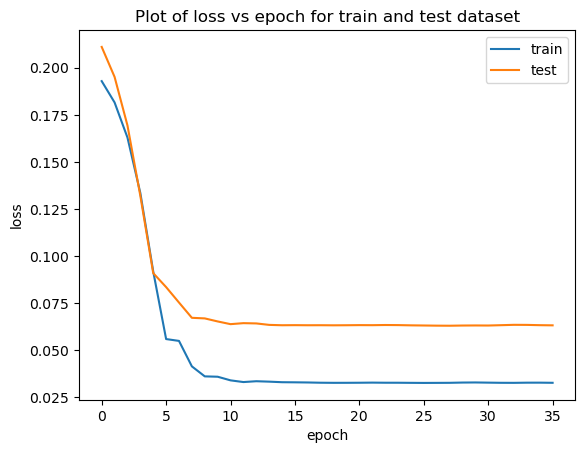

In [19]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()